# EDA on 'BU_trained Data.xlsx'

This is the notebook used to document the EDA process, the hypothesis generation and requisite visualizations. For the current project, I shall be using Python for all tasks. 


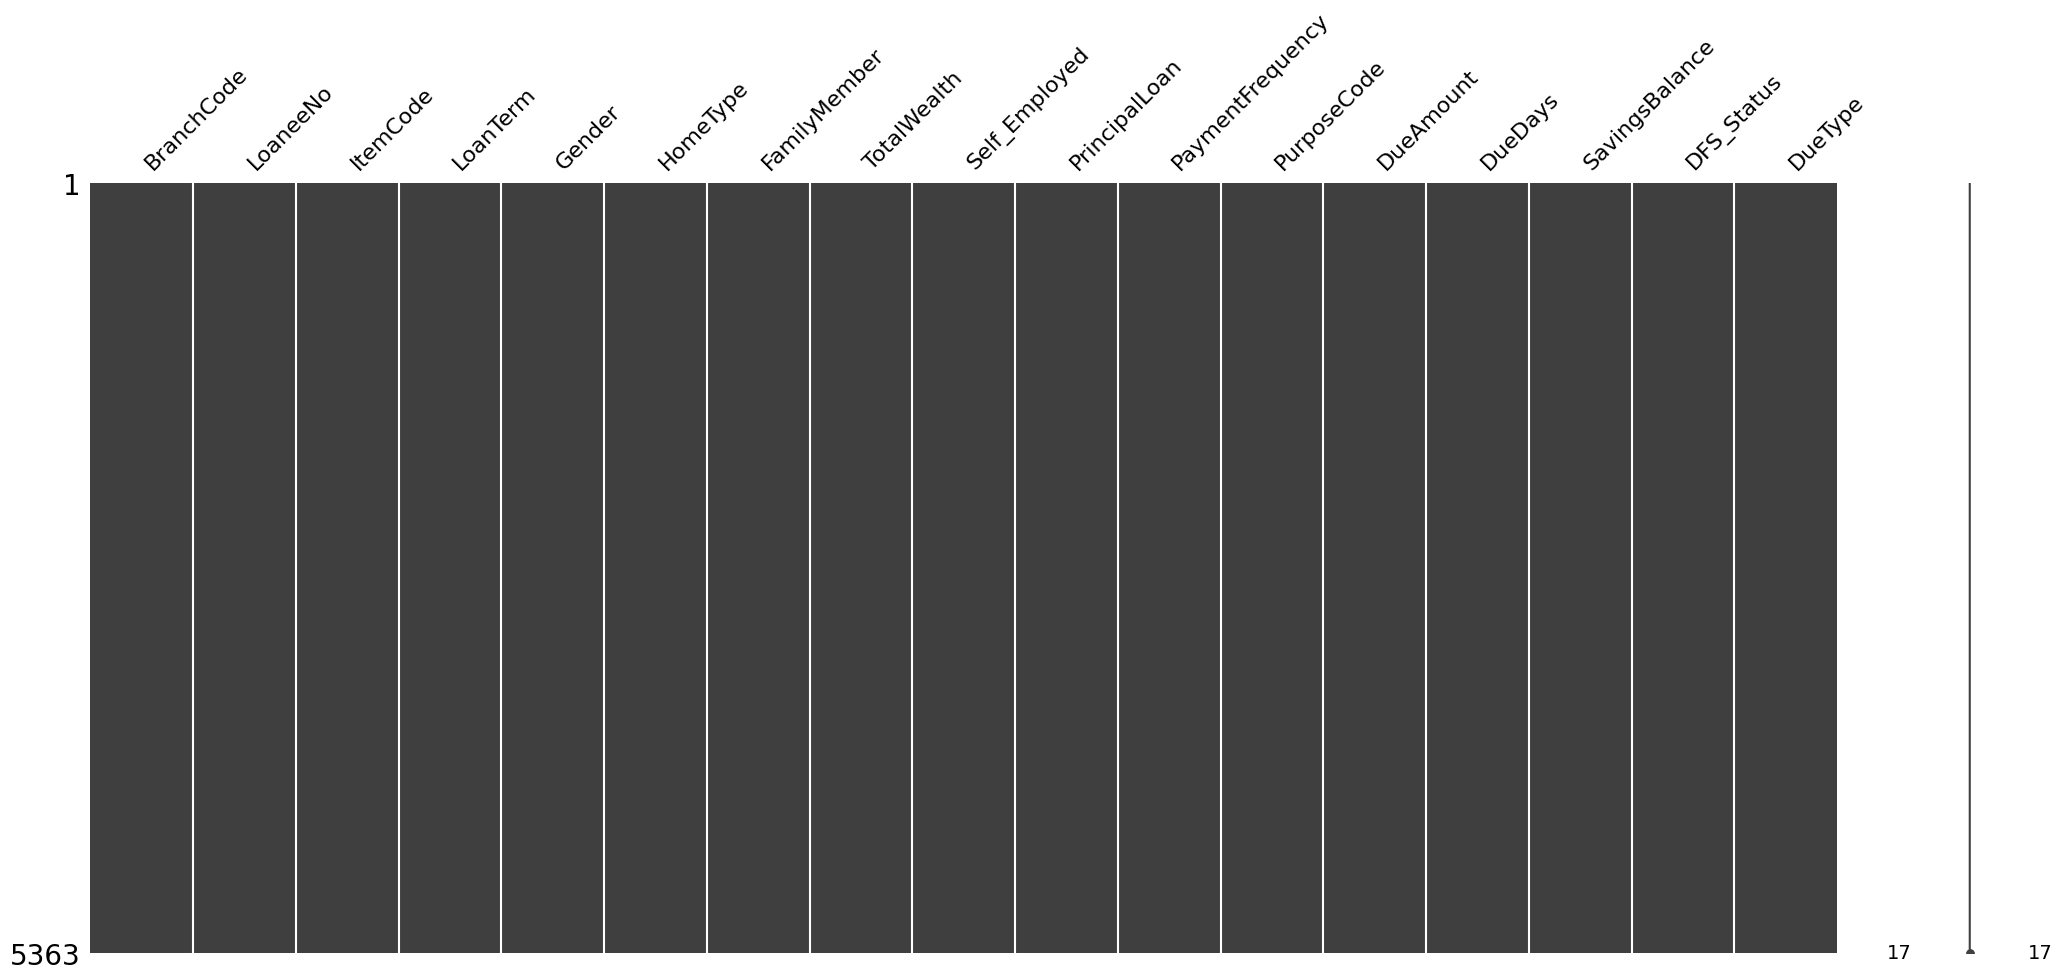

In [1]:
# Importing the requisite libraries, loading and cleaning the dataset.

import pandas as pd
import missingno as msno


df = pd.read_excel('BU_trained Data.xlsx')
msno.matrix(df)
df = df.dropna()


In [2]:
# Taking an initial look at the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BranchCode        5363 non-null   int64  
 1   LoaneeNo          5363 non-null   int64  
 2   ItemCode          5363 non-null   float64
 3   LoanTerm          5363 non-null   int64  
 4   Gender            5363 non-null   object 
 5   HomeType          5363 non-null   object 
 6   FamilyMember      5363 non-null   int64  
 7   TotalWealth       5363 non-null   int64  
 8   Self_Employed     5363 non-null   object 
 9   PrincipalLoan     5363 non-null   int64  
 10  PaymentFrequency  5363 non-null   object 
 11  PurposeCode       5363 non-null   float64
 12  DueAmount         5363 non-null   int64  
 13  DueDays           5363 non-null   int64  
 14  SavingsBalance    5363 non-null   int64  
 15  DFS_Status        5363 non-null   object 
 16  DueType           5363 non-null   object 


In [3]:
print(df.head())

   BranchCode   LoaneeNo  ItemCode  LoanTerm  Gender HomeType  FamilyMember  \
0          39   39103972      2.02         1  Female       TN             6   
1          39   39110777      2.05         1  Female       SB             2   
2         400  400108047      3.03         3  Female       TN             4   
3          89    8916634      1.03         1  Female       TN             3   
4         400  400104472      3.01         3  Female       MU             4   

   TotalWealth Self_Employed  PrincipalLoan PaymentFrequency  PurposeCode  \
0       200000            HW         150000                W         1.17   
1       200000            HW         150000                M         1.17   
2       200000            HW          70000                M        10.63   
3       200000            HW          60000                M         1.77   
4       200000            HW          50000                W         1.17   

   DueAmount  DueDays  SavingsBalance DFS_Status   DueType  
0

Number of unique branches: 3
Number of unique loanees in each branch:
BranchCode
39     1685
89     1583
400    1710
Name: LoaneeNo, dtype: int64


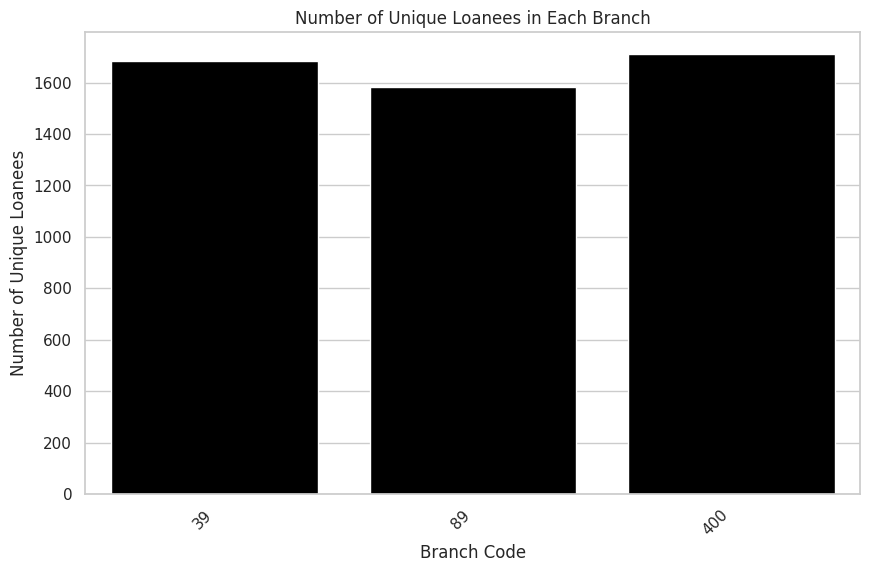

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of unique branches
num_unique_branches = len(df['BranchCode'].unique())
print("Number of unique branches:", num_unique_branches)

# Number of unique loanees in each branch
num_unique_loanees = df.groupby('BranchCode')['LoaneeNo'].nunique()
print("Number of unique loanees in each branch:")
print(num_unique_loanees)

# Set seaborn style to whitegrid and set the color palette to Grayscale
sns.set(style="whitegrid", palette="Greys")

# Create a bar chart with seaborn in black and white
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=num_unique_loanees.index, y=num_unique_loanees.values, color='black', legend=False)
ax.set(xlabel='Branch Code', ylabel='Number of Unique Loanees', title='Number of Unique Loanees in Each Branch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Average total wealth for the loanees of each branch:
BranchCode
39     196033.369214
89     178278.409091
400    178659.025788
Name: TotalWealth, dtype: float64


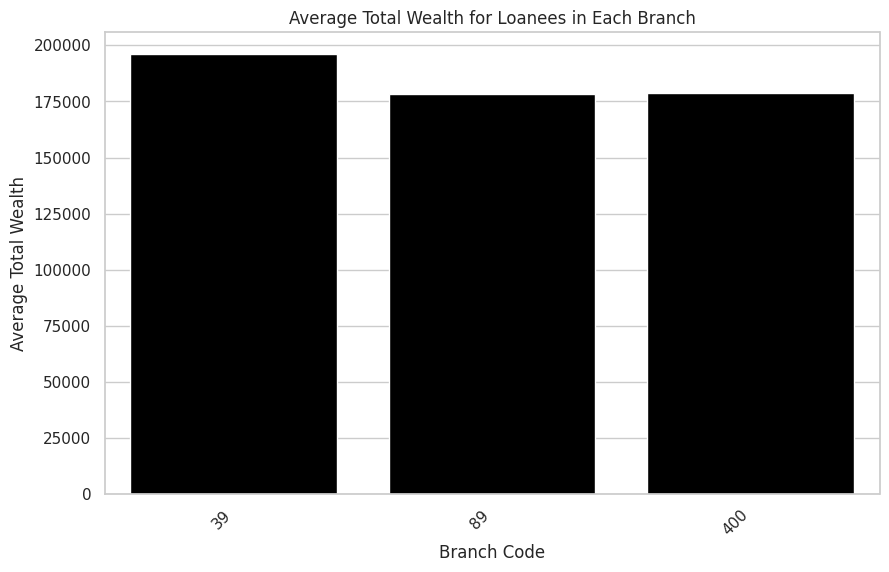

In [5]:
# Average total wealth for the loanees of each branch
average_total_wealth = df.groupby('BranchCode')['TotalWealth'].mean()
print("Average total wealth for the loanees of each branch:")
print(average_total_wealth)

# Set seaborn style to whitegrid and set the color palette to RdYlBuscale
sns.set(style="whitegrid", palette="Greys")

# Create a bar chart for average total wealth with seaborn (no color)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_total_wealth.index, y=average_total_wealth.values, color='black', legend=False)
ax.set(xlabel='Branch Code', ylabel='Average Total Wealth', title='Average Total Wealth for Loanees in Each Branch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Average SavingsBalance for the loanees of each branch:
BranchCode
39     6783.763724
89     7022.851136
400    2373.793123
Name: SavingsBalance, dtype: float64


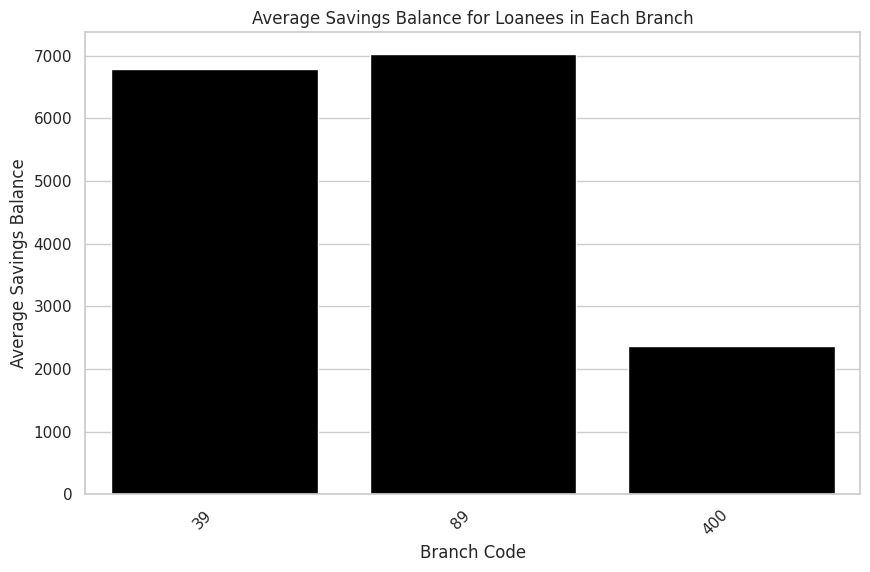

In [6]:
# Average SavingsBalance for the loanees of each branch
average_savings_balance = df.groupby('BranchCode')['SavingsBalance'].mean()
print("Average SavingsBalance for the loanees of each branch:")
print(average_savings_balance)

# Set seaborn style to whitegrid and set the color palette to RdYlBuscale
sns.set(style="whitegrid", palette="Greys")

# Create a bar chart for average SavingsBalance with seaborn (no color)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_savings_balance.index, y=average_savings_balance.values, color='black', legend=False)
ax.set(xlabel='Branch Code', ylabel='Average Savings Balance', title='Average Savings Balance for Loanees in Each Branch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

This is interesting, because if the idea of the savings account balance is negatively correlated with risky loans, the proportion of regular loans compared to loans with high risk of default (watchful, substandard, doubtful) would be lower for branch ```400``` compared to ```89``` and ```39```. Let's take a look.

<Figure size 1500x800 with 0 Axes>

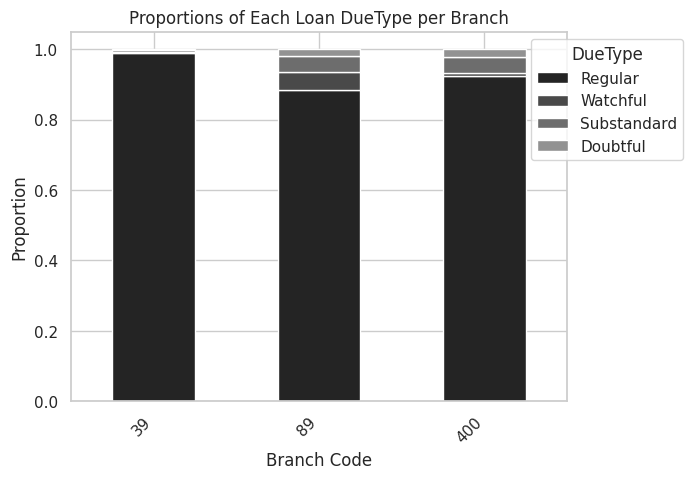

In [7]:
# Define the desired order
order = ['Regular', 'Watchful', 'Substandard', 'Doubtful']


# Calculate the proportions of each loan 'DueType' per branch
due_type_proportions = df.groupby(['BranchCode', 'DueType']).size().unstack(fill_value=0)
due_type_proportions = due_type_proportions.div(due_type_proportions.sum(axis=1), axis=0)
# Rearrange the columns of the DataFrame
due_type_proportions = due_type_proportions[order]

# Set seaborn style to whitegrid and set the color palette to grayscale
sns.set(style="whitegrid", palette="gray")

# Create a stacked bar chart for loan 'DueType' proportions with seaborn (no color)
plt.figure(figsize=(15, 8))  # Increase the figure size
ax = due_type_proportions.plot(kind='bar', stacked=True)
ax.set(xlabel='Branch Code', ylabel='Proportion', title='Proportions of Each Loan DueType per Branch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='DueType', loc='upper right', bbox_to_anchor=(1.25, 1))  # Adjust legend position
plt.show()


But with this visualization, we can see that this is not the case. The branch with the highest savings balance average is the one with the lowest proportion of regular loans. This is not conclusive evidence that there is no significant relationship between savings balance and default risk, but it serves as an indicator.

Rename ```Self_Employed``` to ```Job```.

Now, we can take a look carefully at each variables of interest.
- ```LoanTerm``` and ```Gender``` distributions.
- ```HomeType``` and ```FamilyMembers``` distributions.
- ```DFS_Status``` and ```DueType``` distributions.
- ```PrincipalLoan``` and ```TotalWealth``` descriptive statistics.




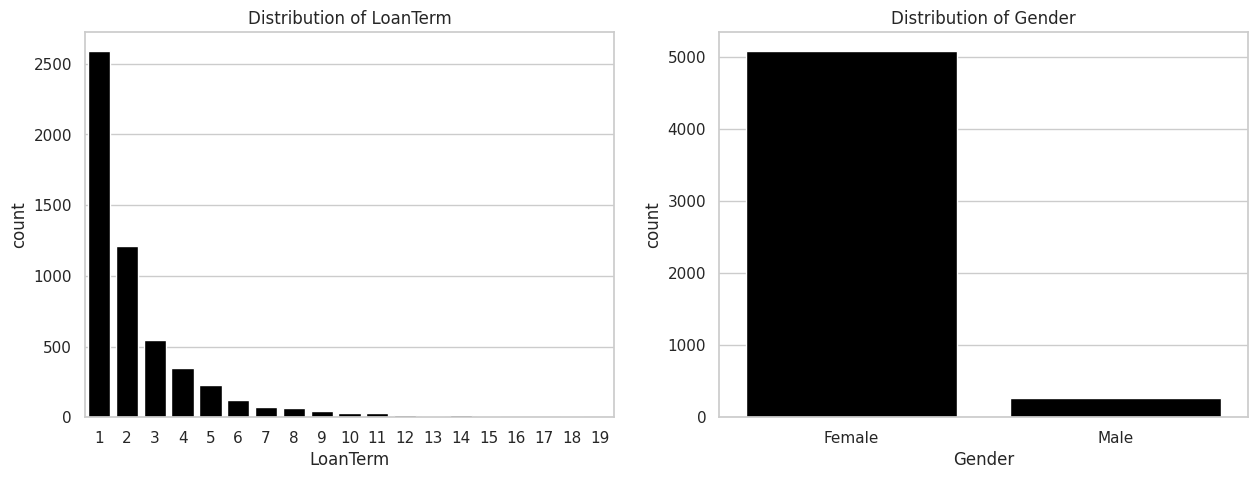

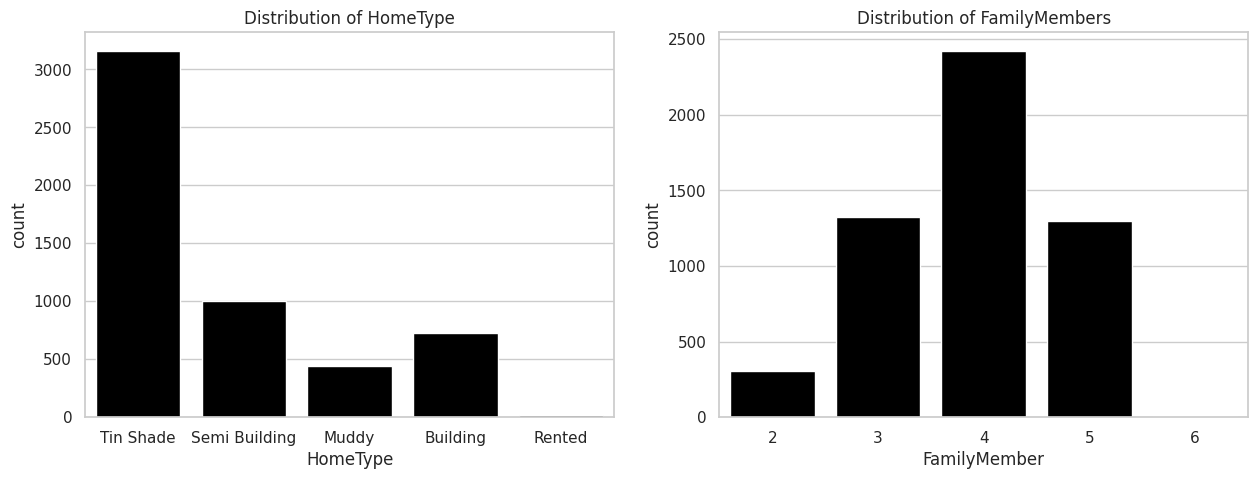

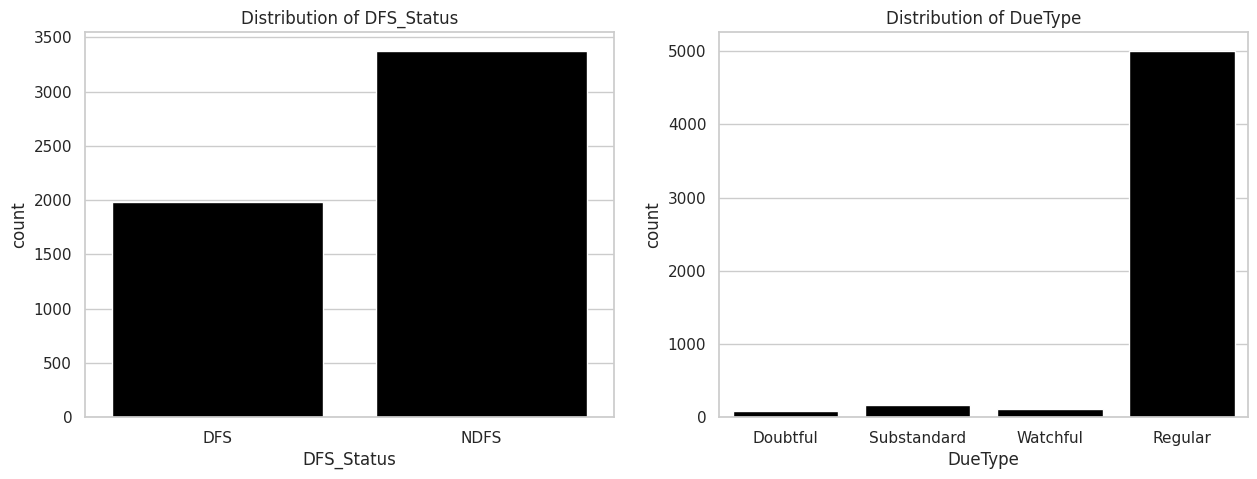

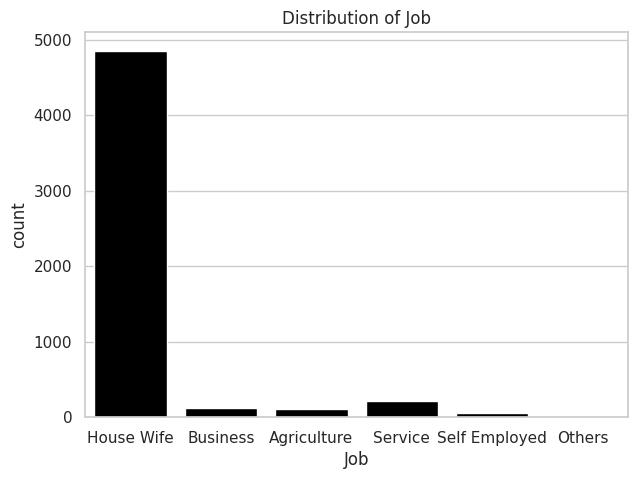

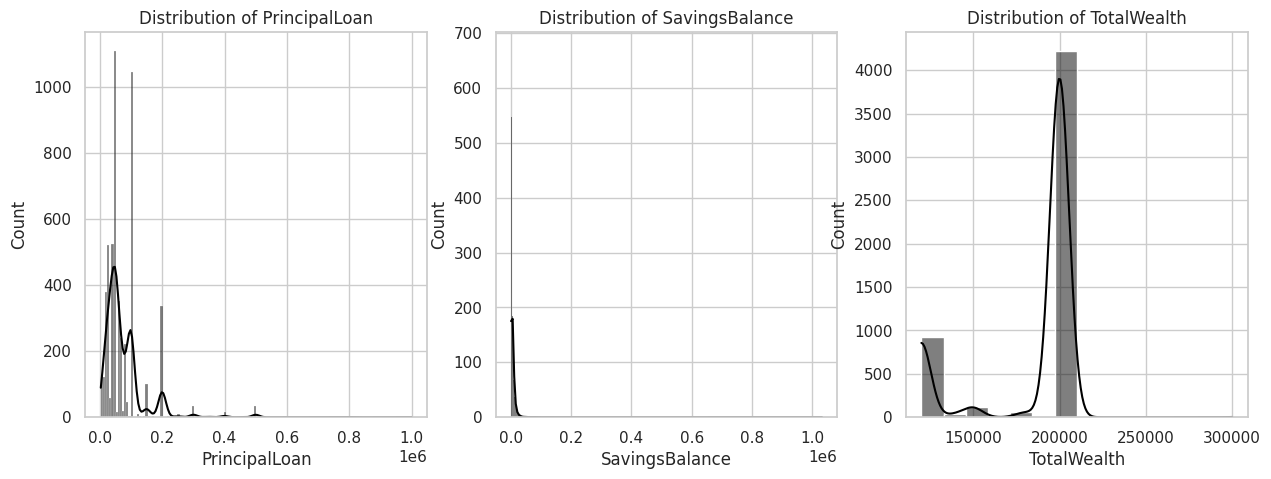

Descriptive Statistics for Principal Loan:
count       5363.000000
mean       74713.810740
std        67229.640147
min         3176.000000
25%        40000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: PrincipalLoan, dtype: float64

Descriptive Statistics for Total Wealth:
count      5363.000000
mean     184553.421592
std       30888.875212
min      120000.000000
25%      200000.000000
50%      200000.000000
75%      200000.000000
max      300000.000000
Name: TotalWealth, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename 'Self_Employed' to 'Job'
df.rename(columns={'Self_Employed': 'Job'}, inplace=True)

# Set seaborn style to whitegrid and set the color palette to Greys
sns.set(style="whitegrid", palette=sns.color_palette("Greys"))

# Plot the distributions for 'LoanTerm' and 'Gender'
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='LoanTerm', data=df, color='black', legend=False)
plt.title('Distribution of LoanTerm')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df, color='black', legend=False)
plt.title('Distribution of Gender')

plt.show()

# Plot the distributions for 'HomeType' and 'FamilyMember'
plt.figure(figsize=(15, 5))
##########################
home_type_dict = {
    'BU': 'Building',
    'MU': 'Muddy',
    'RE': 'Rented',
    'SB': 'Semi Building',
    'TN': 'Tin Shade'
}
df['HomeType'] = df['HomeType'].map(home_type_dict)
###########################

plt.subplot(1, 2, 1)
sns.countplot(x='HomeType', data=df, color='black', legend=False)
plt.title('Distribution of HomeType')

plt.subplot(1, 2, 2)
sns.countplot(x='FamilyMember', data=df, color='black', legend=False)
plt.title('Distribution of FamilyMembers')

plt.show()

# Plot the distributions for 'DFS_Status' and 'DueType'
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='DFS_Status', data=df, color='black', legend=False)
plt.title('Distribution of DFS_Status')

plt.subplot(1, 2, 2)
sns.countplot(x='DueType', data=df, color='black', legend=False)
plt.title('Distribution of DueType')

plt.show()

# Create a dictionary for Job
job_dict = {
    'SM': 'Self Employed',
    'SE': 'Service',
    'BU': 'Business',
    'HW': 'House Wife',
    'AG': 'Agriculture',
    'OH': 'Others'
}
df['Job'] = df['Job'].map(job_dict)

# Additional subplot for 'Job'
plt.figure(figsize=(7, 5))
sns.countplot(x='Job', data=df, color='black', legend=False)
plt.title('Distribution of Job')

plt.show()



# Draw distribution curves for 'PrincipalLoan', 'SavingsBalance', and 'TotalWealth'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['PrincipalLoan'], kde=True, color='black')
plt.title('Distribution of PrincipalLoan')

plt.subplot(1, 3, 2)
sns.histplot(df['SavingsBalance'], kde=True, color='black')
plt.title('Distribution of SavingsBalance')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalWealth'], kde=True, color='black')
plt.title('Distribution of TotalWealth')

plt.show()


# Display descriptive statistics for 'PrincipalLoan' and 'TotalWealth'
print("Descriptive Statistics for Principal Loan:")
print(df['PrincipalLoan'].describe())

print("\nDescriptive Statistics for Total Wealth:")
print(df['TotalWealth'].describe())

Look at hometype, job, and number of family members as risk factors.


But first, let's do the logistic regression between 'SavingsBalance' and 'DueType'. In order to do that, we create a new column called 'binDueType' and store 0 if it is regular, else, store 1.


In [9]:
df['binDueType'] = df['DueType'].apply(lambda x: 0 if x == 'Regular' else 1)


In [10]:
import statsmodels.api as sm

# Add a constant column to the dataframe
df['intercept'] = 1

# Define the independent variable (X) and the dependent variable (y)
X = df[['intercept', 'SavingsBalance']]
y = df['binDueType']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.213565
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             binDueType   No. Observations:                 5363
Model:                          Logit   Df Residuals:                     5361
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1271
Time:                        10:16:02   Log-Likelihood:                -1145.3
converged:                       True   LL-Null:                       -1312.2
Covariance Type:            nonrobust   LLR p-value:                 1.575e-74
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.4674      0.080    -18.400      0.000      -1.624      -1.311
SavingsBalance  

The logistic regression model is used to predict the binary outcome variable `binDueType` based on the predictor variable `SavingsBalance`.

1. **Intercept (-1.4674)**: This is the log-odds of `binDueType` being 1 (or the event happening) when `SavingsBalance` is 0. In other words, when `SavingsBalance` is 0, the log odds of `binDueType` being 1 is -1.4674. The negative sign indicates that the event is less likely to happen when `SavingsBalance` is 0.

2. **SavingsBalance (-0.0005)**: This is the change in log-odds of `binDueType` for a one-unit increase in `SavingsBalance`. In other words, for every one-unit increase in `SavingsBalance`, the log odds of `binDueType` being 1 decrease by 0.0005. The negative sign indicates that as `SavingsBalance` increases, `binDueType` is less likely to be 1.

3. **Pseudo R-squared (0.1271)**: This is a measure of the goodness of fit of the logistic regression model. A value of 0.1271 indicates that about 12.71% of the variability in `binDueType` can be explained by `SavingsBalance`.

4. **LLR p-value (1.575e-74)**: This is the p-value associated with the likelihood ratio test of the model. A very small p-value (close to 0) indicates that the model is significantly better than an empty model (i.e., a model with no predictors).

5. **Z-score (-12.651 for SavingsBalance)**: This is the test statistic for the hypothesis test that the coefficient of `SavingsBalance` is zero. A large absolute value of the z-score and a small p-value indicates that we can reject the null hypothesis that the coefficient is zero.

6. **Confidence Interval ([0.025      0.975])**: This is the range within which we can be confident that the true parameter lies, given the data. For `SavingsBalance`, we can be confident that the true parameter is between -0.001 and -0.000, given the data.

The logistic regression equation based on the given data can be written in LaTeX format as follows:

$$
\log\left(\frac{P(\text{{binDueType}}=1)}{1-P(\text{{binDueType}}=1)}\right) = -1.4674 - 0.0005 \times \text{{SavingsBalance}}
$$

Where:
- $P(\text{{binDueType}}=1)$ is the probability of `binDueType` being 1.
- $\text{{SavingsBalance}}$ is the predictor variable.


The null hypothesis ($H_0$) and the alternative hypothesis ($H_a$) can be written as follows:

- Null Hypothesis ($H_0$): There is no relationship between `SavingsBalance` and `binDueType`. In terms of the coefficient, this can be written as: $$H_0: \beta_{\text{{SavingsBalance}}} = 0$$

- Alternative Hypothesis ($H_a$): There is a relationship between `SavingsBalance` and `binDueType`. In terms of the coefficient, this can be written as: $$H_a: \beta_{\text{{SavingsBalance}}} \neq 0$$

Where:
- $\beta_{\text{{SavingsBalance}}}$ is the coefficient of `SavingsBalance` in the logistic regression model.

These hypotheses are tested using the z-score and the associated p-value. If the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that there is evidence of a relationship between `SavingsBalance` and `binDueType`. In this case, the p-value is very small (close to 0), so we would reject the null hypothesis and conclude that `SavingsBalance` is a significant predictor of `binDueType`. 

In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the probabilities
y_pred_prob = logit_result.predict(X)

# Convert probabilities into binary outcomes
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Print the precision of the model
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5006
           1       0.00      0.00      0.00       357

    accuracy                           0.93      5363
   macro avg       0.47      0.50      0.48      5363
weighted avg       0.87      0.93      0.90      5363



/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This indicates the imbalanced sampling issue is causing problems in predicting irregular loans. 

In [12]:
import statsmodels.api as sm
from sklearn.metrics import classification_report
import numpy as np
from imblearn.over_sampling import SMOTE

# Define the independent variable (X) and the dependent variable (y)
X = df[['SavingsBalance']]
y = df['binDueType']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Add a constant column to the dataframe
X_res['intercept'] = 1

# Fit the logistic regression model
logit_model = sm.Logit(y_res, X_res)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

# Predict the probabilities
y_pred_prob = logit_result.predict(X_res)

# Convert probabilities into binary outcomes
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Print the precision of the model
print(classification_report(y_res, y_pred))


Optimization terminated successfully.
         Current function value: 0.611298
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             binDueType   No. Observations:                10012
Model:                          Logit   Df Residuals:                    10010
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1181
Time:                        12:00:53   Log-Likelihood:                -6120.3
converged:                       True   LL-Null:                       -6939.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SavingsBalance    -0.0003   8.84e-06    -30.053      0.000      -0.000      -0.000
intercept        

Now, we refresh the dataset, and perform an analysis to see whether there is a significant difference in means using the Turkey pairwise comparison test.

In [14]:
df = pd.read_excel('BU_trained Data.xlsx')

# Import necessary libraries
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform pairwise comparison and print the result
print(pairwise_tukeyhsd(df['SavingsBalance'], df['DueType']))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
   Doubtful     Regular  5607.5077  0.127  -982.2759 12197.2913  False
   Doubtful Substandard   646.8072 0.9967 -7258.9423  8552.5566  False
   Doubtful    Watchful  2872.6425 0.8273 -5747.9215 11493.2065  False
    Regular Substandard -4960.7005 0.0248  -9480.095  -441.3061   True
    Regular    Watchful -2734.8652 0.6027 -8412.7324   2943.002  False
Substandard    Watchful  2225.8353 0.8551   -4937.53  9389.2006  False
----------------------------------------------------------------------


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('SavingsBalance ~ C(DueType)', data=df).fit()

# Perform ANOVA and print the result
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


                  sum_sq      df         F    PR(>F)
C(DueType)  7.024666e+09     3.0  4.578746  0.003312
Residual    2.740574e+12  5359.0       NaN       NaN
